In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston

b_data = load_boston()
b_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
X = b_data.data
Y = b_data.target

Y.shape

(506,)

In [4]:
y_data = Y.reshape(-1, 1)
y_data.shape

(506, 1)

In [5]:
from sklearn.preprocessing import MinMaxScaler

mm_m = MinMaxScaler(feature_range= (0, 5)).fit(X)
sc_x_data = mm_m.transform(X)

In [56]:
# 데이터 분류
t_x, tt_x, t_y, tt_y = train_test_split(sc_x_data, y_data, random_state= 10)

In [57]:
# 모델 생성 및 학습
lr = LinearRegression(fit_intercept= True, normalize= False)
rg = Ridge(fit_intercept= True, alpha= 0.1, normalize= False)
lso = Lasso(fit_intercept= True, alpha= 0.1, normalize= False)
sgd = SGDRegressor(fit_intercept= True, alpha= 0.1, max_iter= 1000)

lr.fit(t_x, t_y)
rg.fit(t_x, t_y)
lso.fit(t_x, t_y)
sgd.fit(t_x, t_y)

C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SGDRegressor(alpha=0.1)

In [58]:
# 성능 평가
lr_t_s = lr.score(t_x, t_y)
lr_tt_s = lr.score(tt_x, tt_y)
print(lr_t_s, lr_tt_s)

rg_t_s = rg.score(t_x, t_y)
rg_tt_s = rg.score(tt_x, tt_y)
print(rg_t_s, rg_tt_s)

lso_t_s = lso.score(t_x, t_y)
lso_tt_s = lso.score(tt_x, tt_y)
print(lso_t_s, lso_tt_s)

sgd_t_s = sgd.score(t_x, t_y)
sgd_tt_s = sgd.score(tt_x, tt_y)
print(sgd_t_s, sgd_tt_s)

0.7575686094674801 0.6745585065949402
0.7575684841957252 0.6745476506883203
0.7533819825998691 0.6721307653867756
0.7014985114235619 0.5881283162637609


In [59]:
# 오차값 출력
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_y_pred = lr.predict(tt_x)
print(mean_absolute_error(tt_y, lr_y_pred), mean_squared_error(tt_y, lr_y_pred, squared= False), r2_score(tt_y, lr_y_pred))

rg_y_pred = rg.predict(tt_x)
print(mean_absolute_error(tt_y, rg_y_pred), mean_squared_error(tt_y, rg_y_pred, squared= False), r2_score(tt_y, rg_y_pred))

lso_y_pred = lso.predict(tt_x)
print(mean_absolute_error(tt_y, lso_y_pred), mean_squared_error(tt_y, lso_y_pred, squared= False), r2_score(tt_y, lso_y_pred))

sgd_y_pred = sgd.predict(tt_x)
print(mean_absolute_error(tt_y, sgd_y_pred), mean_squared_error(tt_y, sgd_y_pred, squared= False), r2_score(tt_y, sgd_y_pred))

3.857300907995506 5.695835030617262 0.6745585065949402
3.857252955096328 5.6959300291635815 0.6745476506883203
3.847956035420201 5.7170405633365124 0.6721307653867756
4.268502300866182 6.407696124061427 0.5881283162637609


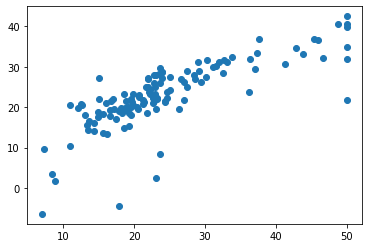

In [60]:
plt.scatter(tt_y, sgd_y_pred)  # 예측값과 실제값으로 그래프를 그렸을 때 y=x에 가까운 선 모양이 나타나면 학습이 잘된 것
plt.show()